In [1]:
import numpy as np, sys
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras import Sequential, Input
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical

#손글씨 인식을 위한 라이브러리 불러오기



In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
#데이터셋을 선별을 일정하게 하기 위한 값 설정

In [3]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
#MNIST 데이터 셋을 학습용, 테스툥으로 구분하여 저장

print("Study-Set image : %d " % (X_train.shape[0]))
print("Test-Set image : %d " % (X_test.shape[0]))
#학습셋과 테스트셋의 데이터 개수 출력

Study-Set image : 60000 
Test-Set image : 10000 


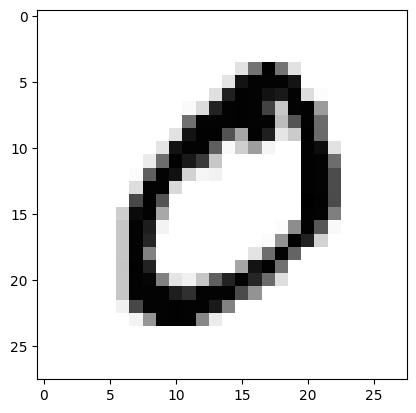

In [ ]:
plt.imshow(X_train[0], cmap='Greys')
#학습셋의 첫번째 데이터의 흑백이미지 생성
plt.show()
#화면상에 출력


In [ ]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

#데이터 값을 행렬로 표기

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	51	159	253	159	50	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	48	238	252	252	252	237	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	54	227	253	252	239	233	252	57	6	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	10	60	224	252	253	252	202	84	252	253	122	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	163	252	252	252	253	252	252	96	189	253	167	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	51	238	253	253	190	114	253	228	47	79	255	168	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	48	238	252	252	179	12	75	121	21	0	0	253	243	50	0	0	0	0	0	
0	0	0	0	0	0	0	0	38	165	253	233	208	84	0	0	0	0	0	0	253	252	165	0	0	0	0	0	
0	0	0	0	0	0	0	7	178	252	240	71	19	28	0	0	0	0	0	0	253	252	195	0	0	0	0	0	
0	0	0	0	0	0	0	57	252	252	63	0	0	0	0	0	0	0	0	0	253	252	195	0	0	0	0	0	
0	0	0	0	0	0	0	198	253	190	0	0	0	0	0	0	0	0	0	0	

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
#학습셋의 2차원 배열을 1차원 배열로 변환

In [7]:
X_train = X_train.astype('float64')
#학습셋의 데이터형을 실수형으로 변환

In [8]:
X_train = X_train / 255
#정규화(0~1 사이 값으로 변환) 수행

In [9]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
#테스트셋에 대해 위의 작업 수행

In [10]:
#해당 데이터의 분류결과 확인
print("class : %d " % (Y_class_train[0]))
#학습셋의 해당 데이터의 분류(class) 출력

class : 5 


In [11]:
Y_train = to_categorical(Y_class_train, 10)
#학습셋 분류값 (0~9)을 바이너리값으로 변환

In [12]:
Y_test = to_categorical(Y_class_test, 10)
#테스트 분류값을 바이너리값으로 변환

In [13]:
print(Y_train[0])
#실습 데이터의 학습셋 바이너리값 출력

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
model = Sequential()
#모델 객체 생성 

In [15]:
model.add(Input(shape=(784,)))
#입력레이어 정의 (독립변수 784개)

In [16]:
model.add(Dense(512, activation='relu'))
#처리레이어 정의 (입력 784개, 출력 512개)


In [17]:
model.add(Dense(10, activation='softmax'))
#출력레이어 정의 (입력 512개, 출력 10개)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#오차 함수는 categorical_crossentropy, 
#활성화 함수는 adam을 사용

In [19]:
#모델 성과 저장 및 모델 최적화시 학습 중단 설정
#성능변화가 10회 없으면 중단
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
#샘플 200개로 30번 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])



Epoch 1: val_loss improved from None to 0.15129, saving model to ./model/01-0.1513.keras

Epoch 2: val_loss improved from 0.15129 to 0.10242, saving model to ./model/02-0.1024.keras

Epoch 3: val_loss improved from 0.10242 to 0.08305, saving model to ./model/03-0.0830.keras

Epoch 4: val_loss improved from 0.08305 to 0.07367, saving model to ./model/04-0.0737.keras

Epoch 5: val_loss improved from 0.07367 to 0.06923, saving model to ./model/05-0.0692.keras

Epoch 6: val_loss improved from 0.06923 to 0.06715, saving model to ./model/06-0.0671.keras

Epoch 7: val_loss improved from 0.06715 to 0.06680, saving model to ./model/07-0.0668.keras

Epoch 8: val_loss improved from 0.06680 to 0.06512, saving model to ./model/08-0.0651.keras

Epoch 9: val_loss improved from 0.06512 to 0.06271, saving model to ./model/09-0.0627.keras

Epoch 10: val_loss did not improve from 0.06271

Epoch 11: val_loss did not improve from 0.06271

Epoch 12: val_loss did not improve from 0.06271

Epoch 13: val_loss

In [21]:
print("\n Test Accracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))
#테스트셋으로 최종 모델의 성능을 축정하여 결과를 출력

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0749

 Test Accracy: 0.9822


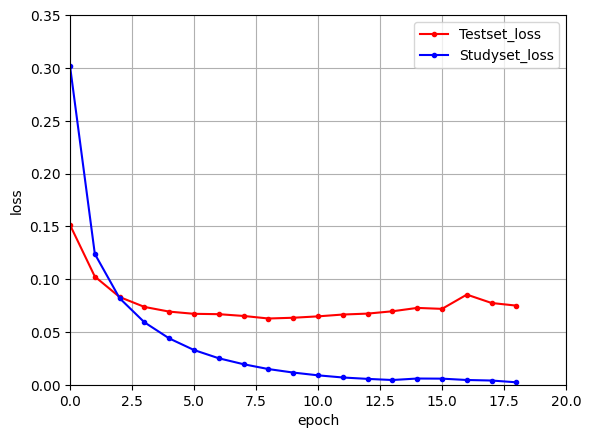

In [22]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Studyset_loss')
plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
#테스트 셋중에서 2025번째 데이터를 가져오기
index = 2025
image = X_test[index]
label = Y_class_test[index]

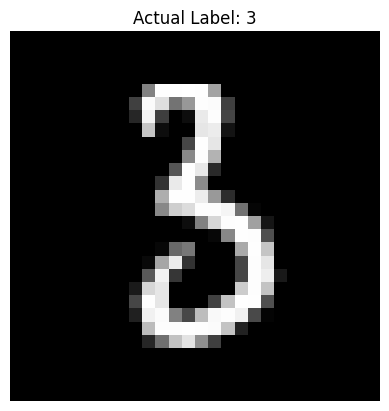

In [24]:
plt.imshow(image.reshape(28,28), cmap='grey')
plt.title(f"Actual Label: {label}")
plt.axis('off')
plt.show()
#라인 68~71 : 2025번째 이미지를 출력하고 해당 이미지의 label 도 출력

In [25]:
prediction = model.predict(image.reshape(1, 784))
predicted_label = prediction.argmax()
print("printed Label: ", predicted_label)

# 모델에 데이터를 입력하여 예측을 수행하고 결과를 확인

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
printed Label:  3
